## Clusterización

In [1]:
#Importar Librerias
import pandas as pd #pandas es la libreria para trabajar con los datos
import cx_Oracle #libreria para realizar consultas a la base de datos Oracle
import os
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import warnings #esto es solo para no mostrar los warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Ruta completa del archivo Excel
ruta_archivo = r"C:\Users\extiea\Downloads\marketing_campaign_ex.csv"

# Cargando la base de datos desde el archivo Excel
df = pd.read_csv(ruta_archivo)

# Cargando la base de datos desde el archivo CSV con punto y coma como separador
df = pd.read_csv(ruta_archivo, delimiter=";")

# Mostrar las primeras filas del DataFrame cargado
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13/11/2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,8/5/2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13/3/2014,68,28,...,20,1,0,0,0,0,0,3,11,0


<center> 
  <h1>Análisis Exploratorio de Datos (EDA) </h1> 
</center>

In [3]:
# Este comando nos proporciona información detallada del DataFrame, incluyendo los tipos de datos, el número de valores no nulos de cada columna y el uso de memoria.
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#Verificamos que columna tiene celdas nulas y el número de celdas nulas
missing_values = df.isnull().sum()
print(missing_values)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [5]:
# Porcentaje de celdas con valores nulos
total_rows = len(df)
missing_percentage = (missing_values / total_rows) * 100
print(missing_percentage)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64


In [6]:
#mostrar los indices de los valores nulos
null_values = df['Income'].isnull()
null_indices = null_values.index[null_values]
print(null_indices)

Int64Index([  10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,
             312,  319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081,
            2084, 2228],
           dtype='int64')


In [7]:
# Cargar un DataFrame con los valores nulos
indices_a_eliminar = [10, 27, 43, 48, 58, 71, 90, 91, 92, 128, 133, 312, 319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081, 2084, 2228]

# Eliminación de los indices con valores nulos
df = df.drop(indices_a_eliminar)

In [8]:
# Verificar si hay valores nulos en el DataFrame
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [9]:
#Resumen estadístico del DataFrame df
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


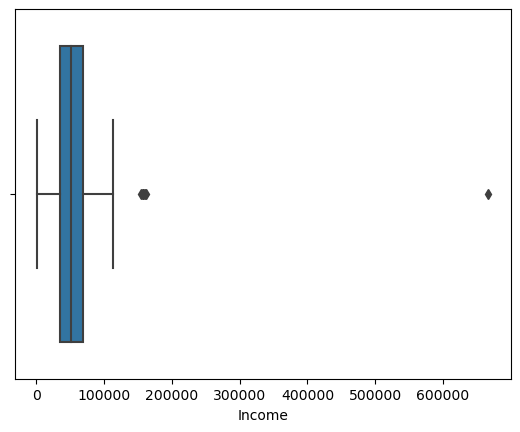

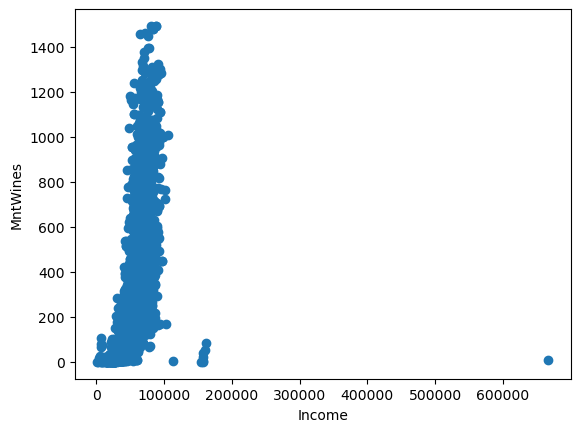

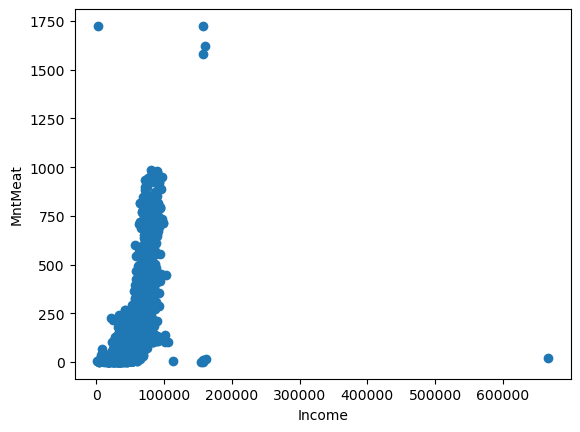

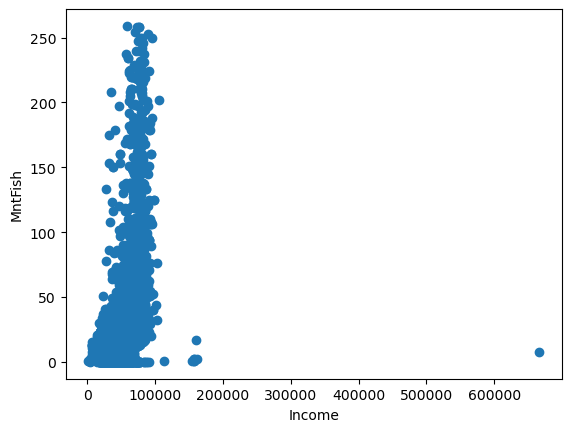

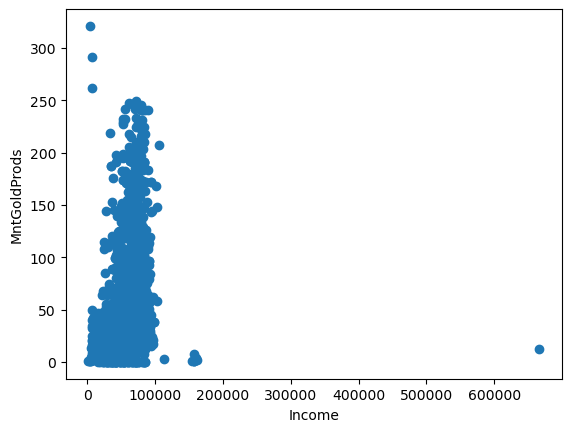

In [10]:
#Estudio de los valores atípicos del DataFrame

# Ejemplo de un box plot para la columna 'Income'
sns.boxplot(x=df['Income'])
plt.show()

# Dispersión de datos entre 'Income' y 'MntWines'
plt.scatter(df['Income'], df['MntWines'])
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.show()

# Dispersión de datos entre 'Income' y 'MntMEats'
plt.scatter(df['Income'], df['MntMeatProducts'])
plt.xlabel('Income')
plt.ylabel('MntMeat')
plt.show()

# Dispersión de datos entre 'Income' y 'MntFish'
plt.scatter(df['Income'], df['MntFishProducts'])
plt.xlabel('Income')
plt.ylabel('MntFish')
plt.show()

# Dispersión de datos entre 'Income' y 'GoldProducts'
plt.scatter(df['Income'], df['MntGoldProds'])
plt.xlabel('Income')
plt.ylabel('MntGoldProds')
plt.show()

In [11]:
# Calcular el primer y tercer cuartil (Q1 y Q3) para la columna 'Income'
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

# Calcular el rango intercuartil (IQR)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar las filas con valores atípicos en la columna 'Income'
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

# Mostrar las filas con valores atípicos
print(outliers)

         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Married  157243.0        0   
617    1503        1976         PhD       Together  162397.0        1   
655    5555        1975  Graduation       Divorced  153924.0        0   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
1653   4931        1977  Graduation       Together  157146.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
164          1    1/3/2014       98        20  ...                  0   
617          1    3/6/2013       31        85  ...                  1   
655          0    7/2/2014       81         1  ...                  0   
687          0    4/8/2012       21        55  ...

In [12]:
#Verificar formato fecha
print(df['Dt_Customer'].dtype)  # Debe mostrar "datetime64[ns]"
print(df['Dt_Customer'])

object
0         4/9/2012
1         8/3/2014
2        21/8/2013
3        10/2/2014
4        19/1/2014
           ...    
2235     13/6/2013
2236     10/6/2014
2237     25/1/2014
2238     24/1/2014
2239    15/10/2012
Name: Dt_Customer, Length: 2216, dtype: object


In [13]:
#Conversion de la fecha al tipo datetime64[ns]
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d/%m/%Y')

In [14]:
#Verificar formato fecha
print(df['Dt_Customer'].dtype)  # Debe mostrar "datetime64[ns]"
print(df['Dt_Customer'])

datetime64[ns]
0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]


In [15]:
# Verificar si hay valores duplicados en la columna 'Dt_Customer'
duplicados = df['Dt_Customer'].duplicated().any()

if duplicados:
    print("Hay valores duplicados en la columna 'Dt_Customer'.")
else:
    print("No hay valores duplicados en la columna 'Dt_Customer'.")

# Ordenar el DataFrame por la columna 'Dt_Customer'
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df = df.sort_values(by='Dt_Customer')

# Mostrar las fechas que se repiten
fecha_repetida = df['Dt_Customer'][df['Dt_Customer'].duplicated(keep=False)]
print("Fechas que se repiten:")
print(fecha_repetida)

Hay valores duplicados en la columna 'Dt_Customer'.
Fechas que se repiten:
976    2012-08-01
724    2012-08-01
2194   2012-08-01
2029   2012-08-01
1484   2012-08-02
          ...    
796    2014-06-28
45     2014-06-28
1812   2014-06-28
989    2014-06-29
200    2014-06-29
Name: Dt_Customer, Length: 2109, dtype: datetime64[ns]


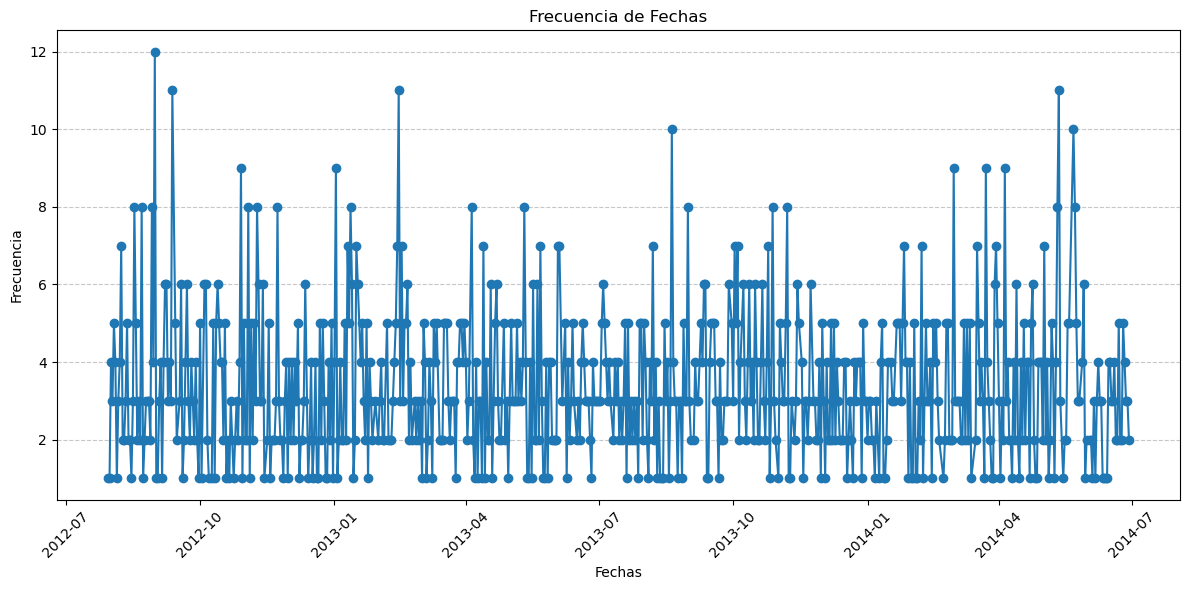

Fecha mínima: 2012-07-30 00:00:00
Fecha máxima: 2014-06-29 00:00:00


In [16]:
#Verificación del Trend de Fechas

# Ordena el DataFrame por 'Dt_Customer'
df = df.sort_values(by='Dt_Customer')

# Cuenta la frecuencia de fechas
fecha_counts = df['Dt_Customer'].value_counts().sort_index()

# Crea un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(fecha_counts.index, fecha_counts.values, marker='o', linestyle='-')
plt.title('Frecuencia de Fechas')
plt.xlabel('Fechas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Determinar rango de fechas
min_date = df['Dt_Customer'].min()
max_date = df['Dt_Customer'].max()
print(f"Fecha mínima: {min_date}")
print(f"Fecha máxima: {max_date}")


In [17]:
# Exploración de las variables no númericas

education_counts = df['Education'].value_counts()
marital_status_counts = df['Marital_Status'].value_counts()

print("Conteo de valores únicos en Education:")
print(education_counts)

print("\nConteo de valores únicos en Marital_Status:")
print(marital_status_counts)

Conteo de valores únicos en Education:
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Conteo de valores únicos en Marital_Status:
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


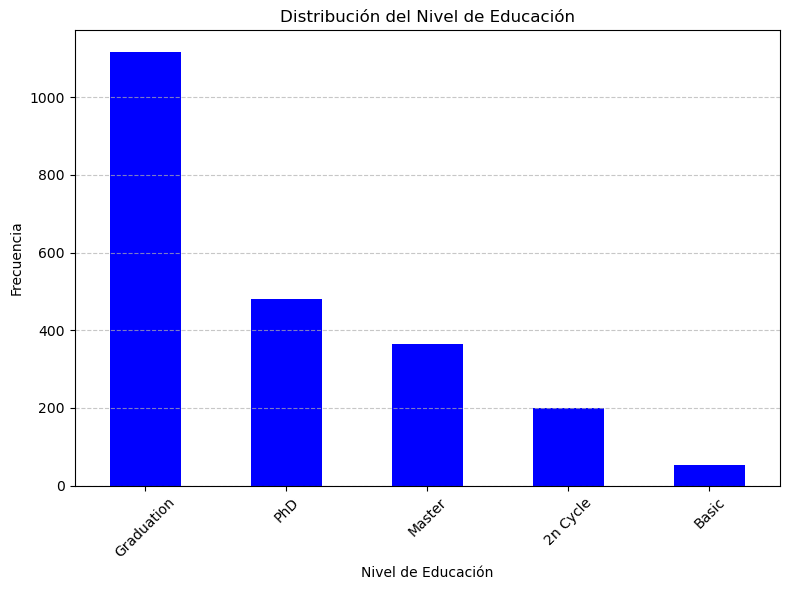

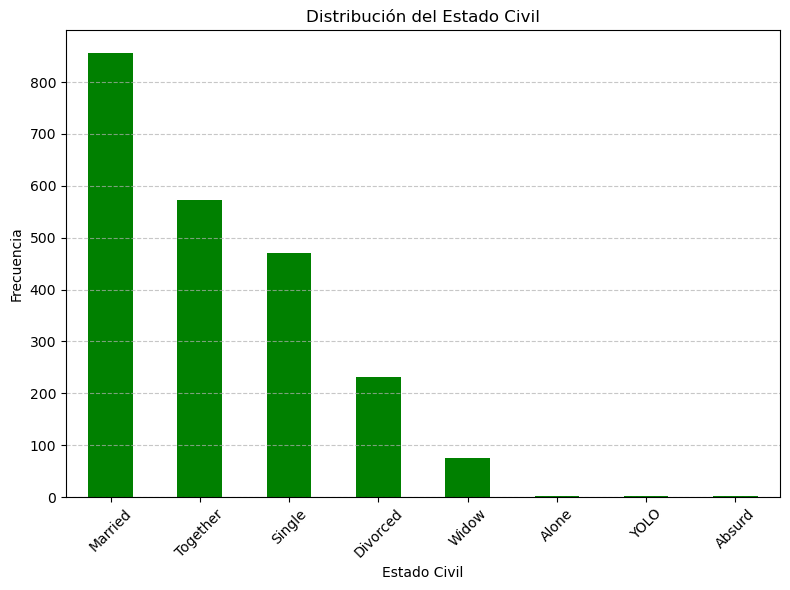

Moda de Education: Graduation
Moda de Marital_Status: Married


In [18]:
# Distribución de las variables no númericas

# Gráfico de barras para Education
plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', color='b')
plt.title('Distribución del Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de barras para Marital_Status
plt.figure(figsize=(8, 6))
marital_status_counts.plot(kind='bar', color='g')
plt.title('Distribución del Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analisis Descriptivo de las variables no númericas
mode_education = df['Education'].mode()[0]
mode_marital_status = df['Marital_Status'].mode()[0]

print("Moda de Education:", mode_education)
print("Moda de Marital_Status:", mode_marital_status)

In [19]:
#Creación de nuevas variables

#Edad del cliente 
df["Age"] = 2021-df["Year_Birth"]

# Total Gastado por cliente
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Situación civil en relación a su vivienda
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Total de niños en un hogar
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Total de miembros de una familia
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Caracteristica relacionada a la paternidad
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmentación en 3 niveles por educación
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Se renombra las variables para mejor claridad
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [20]:
#Luego de la modificaciones y creaciones de nuevas variables nuestro DataFrame quedo así;
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
1255,6653,1970,Postgraduate,Married,55158.0,1,1,2012-07-30,72,293,...,0,3,11,1,51,418,Partner,2,4,1
1363,6181,1950,Undergraduate,Together,52203.0,0,0,2012-07-31,36,488,...,0,3,11,0,71,939,Partner,0,2,0
976,2611,1959,Postgraduate,Together,82576.0,0,0,2012-08-01,66,1206,...,0,3,11,0,62,1910,Partner,0,2,0
724,4692,1976,Graduate,Married,7500.0,1,0,2012-08-01,19,7,...,0,3,11,1,45,71,Partner,1,3,1
2194,7118,1957,Graduate,Married,73803.0,0,1,2012-08-01,61,833,...,0,3,11,1,64,1528,Partner,1,3,1
2029,10001,1985,Undergraduate,Together,7500.0,1,0,2012-08-01,98,5,...,0,3,11,0,36,100,Partner,1,3,1
1484,8370,1976,Undergraduate,Together,75484.0,0,1,2012-08-02,50,378,...,0,3,11,0,45,1159,Partner,1,3,1
1976,5117,1963,Undergraduate,Married,32632.0,0,0,2012-08-02,32,63,...,0,3,11,0,58,576,Partner,0,2,0
2192,7990,1947,Graduate,Married,27469.0,0,0,2012-08-02,2,9,...,0,3,11,0,74,17,Partner,0,2,0
1067,2223,1965,Undergraduate,Divorced,64176.0,0,1,2012-08-03,52,1215,...,0,3,11,0,56,1826,Alone,1,2,1


In [21]:
#Se procede a eliminar variables redundantes
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df_new = df.drop(to_drop, axis=1)

In [22]:
#Luego de eliminar nuestras variables redundates el DataFrame queda así;
df_new.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
1255,Postgraduate,55158.0,1,1,72,293,0,87,4,11,...,0,0,0,1,51,418,Partner,2,4,1
1363,Undergraduate,52203.0,0,0,36,488,21,238,56,108,...,0,0,0,0,71,939,Partner,0,2,0
976,Postgraduate,82576.0,0,0,66,1206,55,445,168,18,...,0,0,0,0,62,1910,Partner,0,2,0
724,Graduate,7500.0,1,0,19,7,0,12,13,7,...,0,0,0,1,45,71,Partner,1,3,1
2194,Graduate,73803.0,0,1,61,833,80,363,52,26,...,0,0,0,1,64,1528,Partner,1,3,1


In [23]:
# Estadisticas Descriptiva de los datos
df_new.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,128.000000,2525.000000,3.000000,5.000000,1.000000


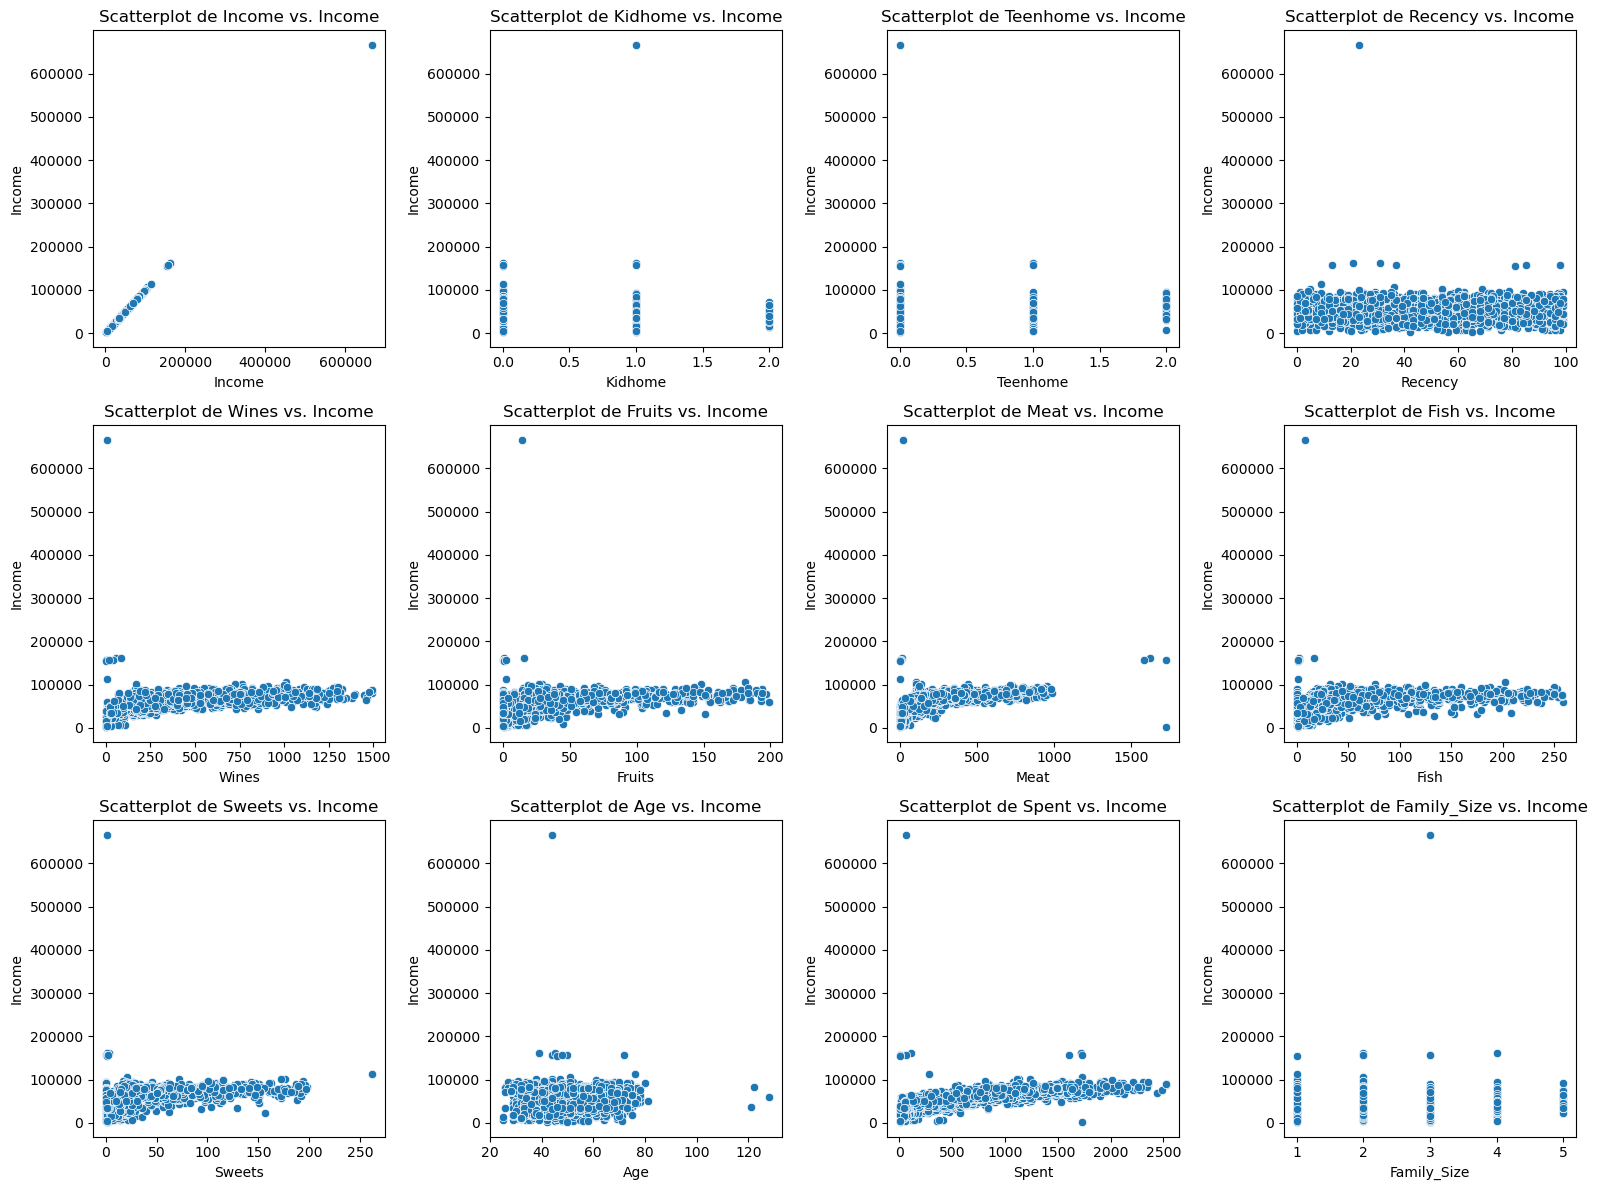

In [24]:
# Subconjunto de variables numéricas
numeric_variables = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Age', 'Spent', 'Family_Size']

# Crear subgráficos
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

# Iterar a través de las variables numéricas y crear gráficos de dispersión
for i, var in enumerate(numeric_variables):
    row, col = i // 4, i % 4
    sns.scatterplot(x=var, y='Income', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Scatterplot de {var} vs. Income')

# Ajustar espaciado
plt.tight_layout()
plt.show()

In [25]:
#Eliminar valores atipicos
df_new = df_new[(df_new["Age"]<90)]
df_new = df_new[(df_new["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df_new))

The total number of data-points after removing the outliers are: 2212


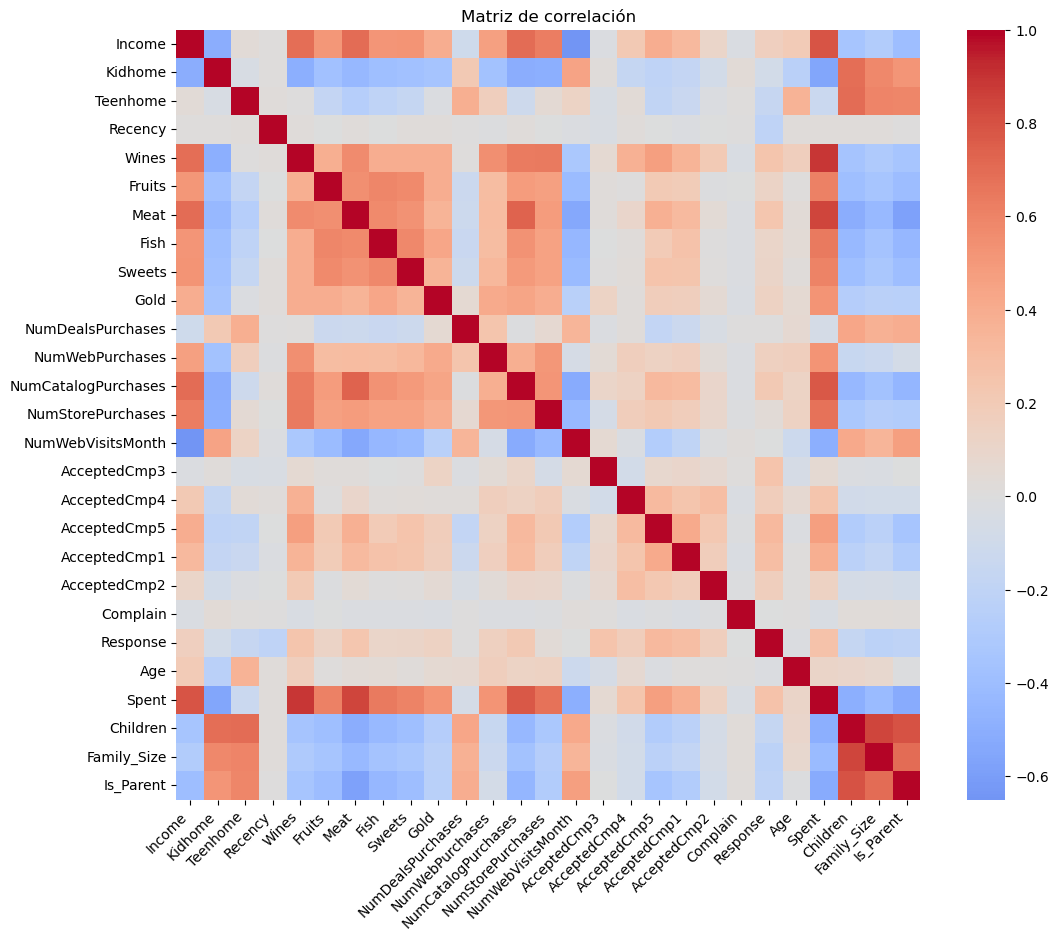

In [26]:
# Calcular la matriz de correlación solo para las columnas numéricas
corr_matrix = df_new.corr(numeric_only=True)

# Crear un gráfico de calor
plt.figure(figsize=(12, 10))  # Ajusta el tamaño del gráfico según tus necesidades

# Mostrar la matriz de correlación como un mapa de calor usando Seaborn
heatmap = sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)

# Rotar las etiquetas en el eje X para evitar superposiciones
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Matriz de correlación")
plt.show()

In [27]:
#Obtener variables tipo Objeto
s = (df_new.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [28]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
LE = LabelEncoder()

# Iterar a través de las columnas categóricas y ajustar el codificador de etiquetas
for i in object_cols:
    LE.fit(df_new[i])
    df_new[i] = LE.transform(df_new[i])

print("All features are now numerical")

All features are now numerical


In [29]:
#DataFrame convirtiendo las vriables categoricas a númericas
df_new.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
1255,1,55158.0,1,1,72,293,0,87,4,11,...,0,0,0,1,51,418,1,2,4,1
1363,2,52203.0,0,0,36,488,21,238,56,108,...,0,0,0,0,71,939,1,0,2,0
976,1,82576.0,0,0,66,1206,55,445,168,18,...,0,0,0,0,62,1910,1,0,2,0
724,0,7500.0,1,0,19,7,0,12,13,7,...,0,0,0,1,45,71,1,1,3,1
2194,0,73803.0,0,1,61,833,80,363,52,26,...,0,0,0,1,64,1528,1,1,3,1


In [30]:
#Creamos una copia del Dataframe
dF = df_new.copy()
# Creación de un dataframecon las columnas a eliminar
colums_delet = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Education','Recency','Kidhome','Teenhome','Children','Living_With','Is_Parent']
dF = dF.drop(colums_delet, axis=1)

In [31]:
# DataFrame reducido al eliminar las variables categoricas
dF.head()

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Family_Size
1255,55158.0,293,0,87,4,11,23,4,7,2,5,7,51,418,4
1363,52203.0,488,21,238,56,108,28,1,8,7,11,6,71,939,2
976,82576.0,1206,55,445,168,18,18,1,2,4,12,1,62,1910,2
724,7500.0,7,0,12,13,7,32,5,4,1,2,9,45,71,3
2194,73803.0,833,80,363,52,26,174,2,9,5,6,6,64,1528,3


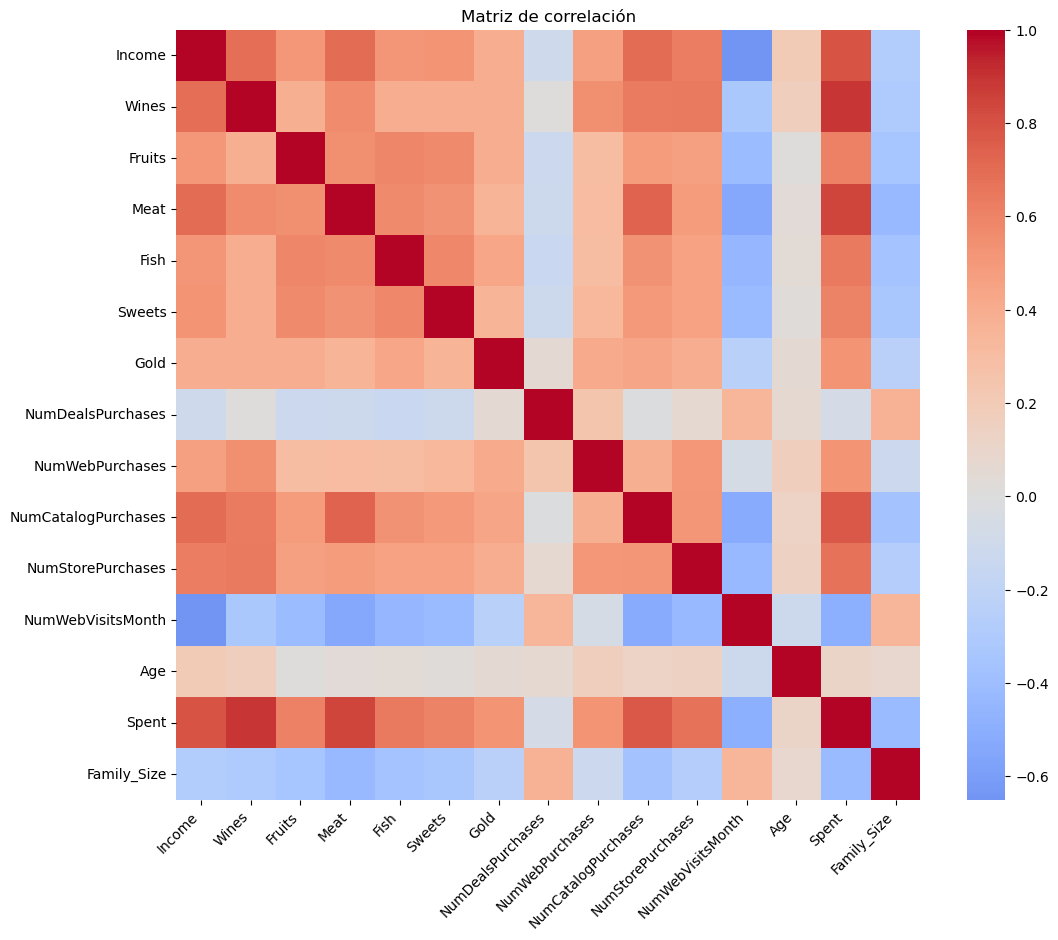

In [32]:
# Calcular la matriz de correlación solo para las columnas numéricas
corr_matrix = dF.corr(numeric_only=True)

# Crear un gráfico de calor
plt.figure(figsize=(12, 10))  # Ajusta el tamaño del gráfico según tus necesidades

# Mostrar la matriz de correlación como un mapa de calor usando Seaborn
heatmap = sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)

# Rotar las etiquetas en el eje X para evitar superposiciones
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Matriz de correlación")
plt.show()

In [33]:
#Normalización Z-Score (estandarización)
# Selecciona las columnas numéricas a normalizar
numeric_columns = dF.select_dtypes(include=['int64', 'float64']).columns

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Aplica la normalización Z-Score a las columnas numéricas
dF[numeric_columns] = scaler.fit_transform(dF[numeric_columns])


In [34]:
#A continuación el Dataframe que se utilizará en el modelo
print("Dataframe to be used for further modelling:")
dF[numeric_columns].head()

Dataframe to be used for further modelling:


,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Family_Size
1255,0.148645,-0.036435,-0.662628,-0.356951,-0.614480,-0.390601,-0.404792,0.870761,1.062110,-0.229679,-0.248141,0.692181,-0.092858,-0.314202,1.552784
1363,0.011346,0.541777,-0.134128,0.316543,0.335124,1.970547,-0.308072,-0.688432,1.426865,1.478625,1.597897,0.279818,1.616696,0.550705,-0.654644
976,1.422572,2.670782,0.721540,1.239810,2.380425,-0.220209,-0.501513,-0.688432,-0.761665,0.453643,1.905570,-1.781997,0.847397,2.162652,-0.654644
724,-2.065698,-0.884479,-0.662628,-0.691468,-0.450126,-0.487968,-0.230695,1.390492,-0.032155,-0.571340,-1.171160,1.516906,-0.605725,-0.890253,0.449070
2194,1.014951,1.564767,1.350707,0.874072,0.262077,-0.025475,2.516170,-0.168701,1.791619,0.795303,0.059532,0.279818,1.018352,1.528497,0.449070


# PCA

        PC1       PC2
0 -1.146880  1.840931
1  2.352001  0.646490
2  4.241219 -0.751452
3 -3.003663  0.970648
4  3.133745  1.784100


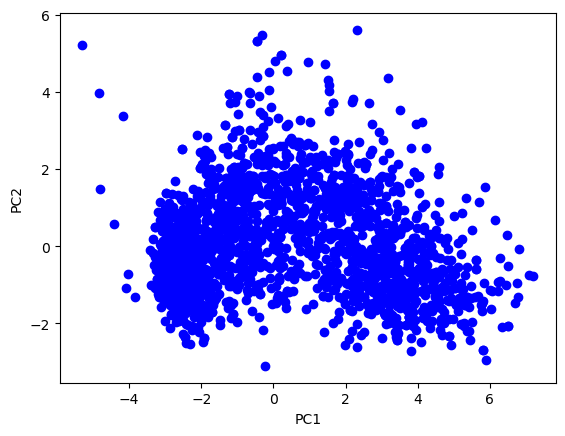

In [35]:
# Inicializar PCA con el número de componentes deseados (2 en este caso)
n_components = 2
pca = PCA(n_components=n_components)

# Realizar el PCA en los datos estandarizados
pca_result = pca.fit_transform(dF[numeric_columns])

# Crear un DataFrame con los resultados del PCA
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Mostrar el DataFrame resultante
print(pca_df.head())

# Crear un gráfico 2D
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='b', marker='o')

# Etiquetar los ejes
plt.xlabel('PC1')
plt.ylabel('PC2')

# Mostrar el gráfico 2D
plt.show()


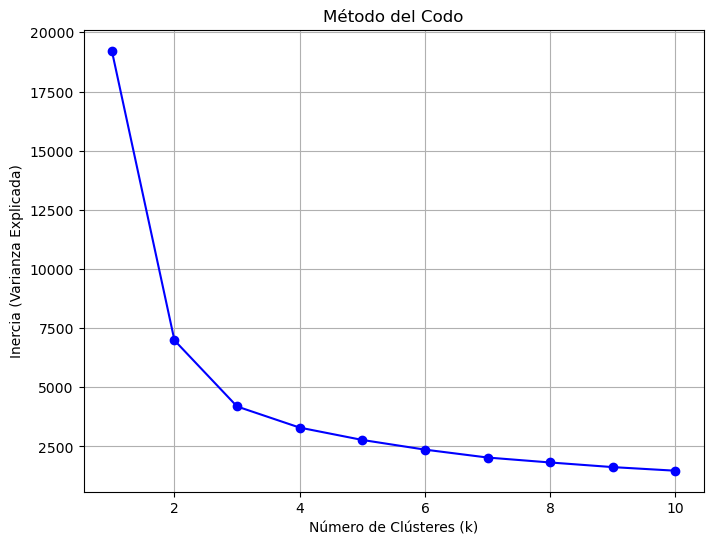

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Crear una lista para almacenar los valores de inercia (varianza explicada)
inertia = []

# Definir el rango de valores de k que deseas probar
k_range = range(1, 11)

# Calcular la inercia para diferentes valores de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)  # Utiliza los datos transformados por PCA
    inertia.append(kmeans.inertia_)

# Mostrar el gráfico del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia (Varianza Explicada)')
plt.grid(True)
plt.show()

In [37]:
import hdbscan
from sklearn.metrics import silhouette_score

# Ajuste de la gama de valores de min_cluster_size según necesidad.
min_cluster_sizes = range(2, 21)
best_silhouette_score = -1
best_min_cluster_size = None

for min_size in min_cluster_sizes:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size)
    cluster_labels = clusterer.fit_predict(dF)
    if len(set(cluster_labels)) > 1:  # Verifica si se forman clústeres
        silhouette_avg = silhouette_score(dF, cluster_labels)
        print(f"min_cluster_size: {min_size}, Silhouette Score: {silhouette_avg}")
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_min_cluster_size = min_size

print(f"Mejor min_cluster_size: {best_min_cluster_size}, Mejor Silhouette Score: {best_silhouette_score}")


min_cluster_size: 2, Silhouette Score: -0.2324335669032233
min_cluster_size: 3, Silhouette Score: -0.36401774477715976
min_cluster_size: 4, Silhouette Score: -0.24297693138560172
min_cluster_size: 5, Silhouette Score: 0.06485264452209752
min_cluster_size: 6, Silhouette Score: 0.059535440830442946
min_cluster_size: 7, Silhouette Score: 0.06917139495287071
min_cluster_size: 8, Silhouette Score: 0.1261686326073547
min_cluster_size: 9, Silhouette Score: 0.0009846962305115434
min_cluster_size: 10, Silhouette Score: -0.006064032964056292
min_cluster_size: 11, Silhouette Score: -0.010981120145784892
min_cluster_size: 12, Silhouette Score: -0.017146580290213848
min_cluster_size: 13, Silhouette Score: -0.020802240836189454
min_cluster_size: 14, Silhouette Score: -0.0239497194659577
min_cluster_size: 15, Silhouette Score: -0.029916857415539504
min_cluster_size: 16, Silhouette Score: -0.0329142895116123
min_cluster_size: 17, Silhouette Score: -0.03696367659423405
min_cluster_size: 18, Silhouette 

Número de clústeres: 19


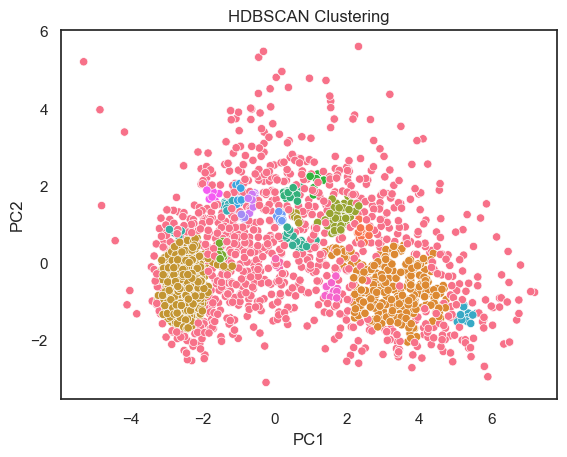

In [38]:
import hdbscan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una instancia de HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=8, gen_min_span_tree=True)

# Ajustar el modelo a tus datos
clusterer.fit(pca_df)  # Usamos los datos transformados por PCA

# Obtener las etiquetas de clúster para cada punto de datos
labels = clusterer.labels_

# Mostrar el número de clústeres encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Excluyendo los puntos de ruido
print(f'Número de clústeres: {n_clusters}')

# Visualizar los clústeres
sns.set(style='white')
palette = sns.color_palette('husl', n_clusters)
cluster_colors = [palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in labels]

# Utiliza el parámetro legend=False para evitar que la leyenda se superponga
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=cluster_colors, legend=False)

plt.title('HDBSCAN Clustering')
plt.show()


# K-means

Coeficiente de Silhouette: 0.5247356838383384


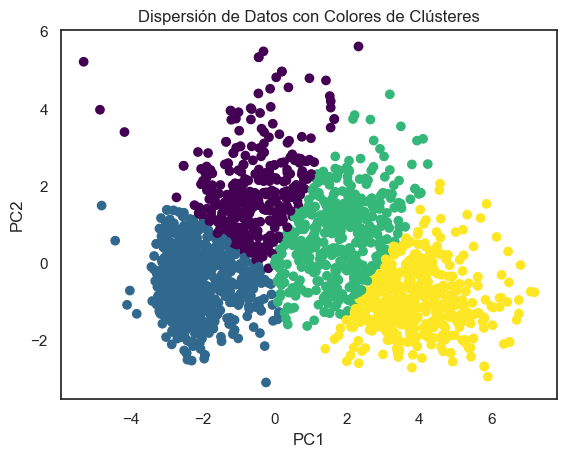

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Especifica el número de clústeres que deseas
n_clusters = 4

# Inicializa el modelo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajusta el modelo a tus datos normalizados (en dF)
kmeans.fit(pca_df)

# Obtiene las etiquetas de los clústeres para cada punto de datos
cluster_labels = kmeans.labels_

# Agrega la columna de clústeres a tu DataFrame original df_new
pca_df['Cluster'] = cluster_labels

# Calcula el coeficiente de Silhouette
silhouette_avg = silhouette_score(pca_df, cluster_labels)
print(f'Coeficiente de Silhouette: {silhouette_avg}')

# Realiza la visualización de la dispersión de los datos
import matplotlib.pyplot as plt

# Dibuja la dispersión de datos con colores según los clústeres
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dispersión de Datos con Colores de Clústeres')
plt.show()


# Agglomerative Clustering Model

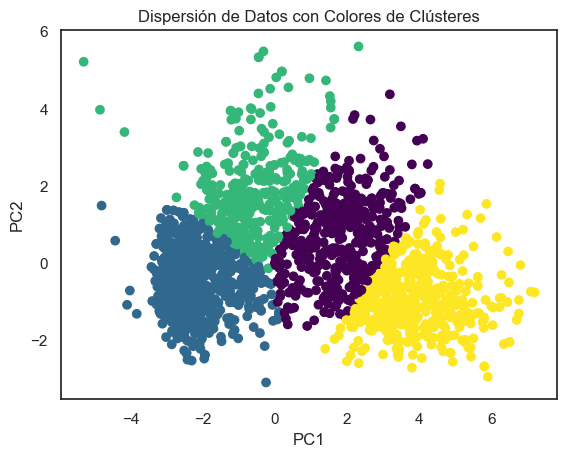

Coeficiente de Silhouette: 0.5716533329702884


In [40]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Especifica el número de clústeres que deseas
n_clusters = 4

# Inicializa el modelo de Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Ajusta el modelo a tus datos normalizados (en dF)
agg_clustering.fit(pca_df)

# Obtiene las etiquetas de los clústeres para cada punto de datos
cluster_labels = agg_clustering.labels_

# Agrega la columna de clústeres a tu DataFrame original df
pca_df['Cluster'] = cluster_labels

# Realiza la visualización de la dispersión de los datos
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dispersión de Datos con Colores de Clústeres')
plt.show()

# Asume que 'data' son tus datos y 'cluster_labels' son las etiquetas de los clústeres
silhouette_avg = silhouette_score(pca_df, cluster_labels)

# Imprime el valor del coeficiente de Silhouette
print(f'Coeficiente de Silhouette: {silhouette_avg}')

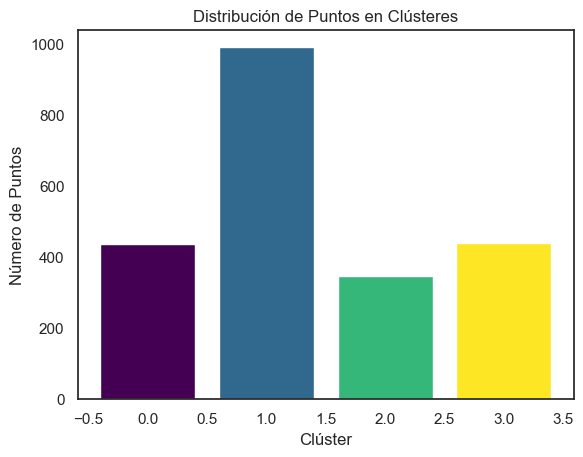

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Calcula la cantidad de puntos en cada clúster
unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)

# Define una paleta de colores personalizada basada en la paleta 'viridis'
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Convierte las etiquetas de clústeres en enteros
unique_clusters = unique_clusters.astype(int)

# Crea un gráfico de barras con colores coincidentes
plt.bar(unique_clusters, cluster_counts, color=colors, width=0.8, align='center')  # Ajusta el ancho a 0.8 y alinea al centro

# Agrega etiquetas a los ejes
plt.xlabel('Clúster')
plt.ylabel('Número de Puntos')
plt.title('Distribución de Puntos en Clústeres')

# Muestra el gráfico de barras
plt.show()

In [42]:
# Agrega la columna de clústeres a tu DataFrame original df
df_new['Cluster'] = cluster_labels  # Asumiendo que df contiene tus datos originales
df_new.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Cluster
1255,1,55158.0,1,1,72,293,0,87,4,11,...,0,0,1,51,418,1,2,4,1,2
1363,2,52203.0,0,0,36,488,21,238,56,108,...,0,0,0,71,939,1,0,2,0,0
976,1,82576.0,0,0,66,1206,55,445,168,18,...,0,0,0,62,1910,1,0,2,0,3
724,0,7500.0,1,0,19,7,0,12,13,7,...,0,0,1,45,71,1,1,3,1,1
2194,0,73803.0,0,1,61,833,80,363,52,26,...,0,0,1,64,1528,1,1,3,1,0


# Analisis de los Clústers

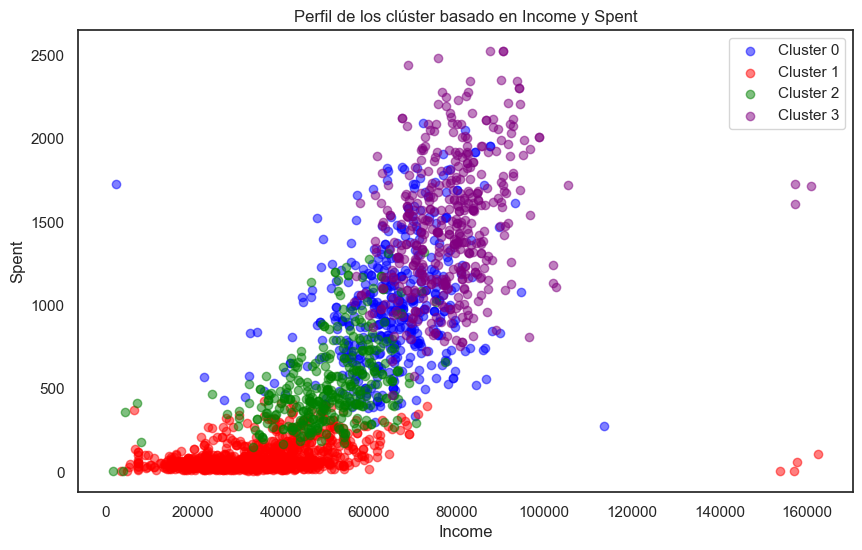

In [43]:
import matplotlib.pyplot as plt

# Filtrar los datos por clúster
cluster0 = df_new[df_new['Cluster'] == 0]
cluster1 = df_new[df_new['Cluster'] == 1]
cluster2 = df_new[df_new['Cluster'] == 2]
cluster3 = df_new[df_new['Cluster'] == 3]

# Gráfico de dispersión para cada clúster
plt.figure(figsize=(10, 6))
plt.scatter(cluster0['Income'], cluster0['Spent'], label='Cluster 0', c='blue', alpha=0.5)
plt.scatter(cluster1['Income'], cluster1['Spent'], label='Cluster 1', c='red', alpha=0.5)
plt.scatter(cluster2['Income'], cluster2['Spent'], label='Cluster 2', c='green', alpha=0.5)
plt.scatter(cluster3['Income'], cluster3['Spent'], label='Cluster 3', c='purple', alpha=0.5)

# Etiquetas de los ejes y título
plt.xlabel('Income')
plt.ylabel('Spent')
plt.title('Perfil de los clúster basado en Income y Spent')

# Agrega una leyenda para identificar los clústeres
plt.legend()

# Muestra el gráfico
plt.show()

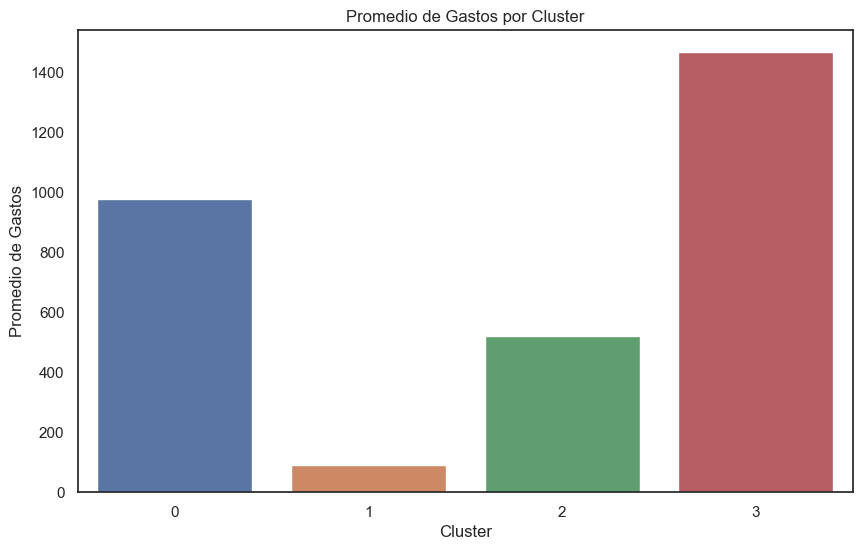

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Se agrupa los datos por la columna 'Cluster' y se calcula el promedio de 'Spent' para cada clúster
cluster_means = df_new.groupby('Cluster')['Spent'].mean().reset_index()

# Grafica el promedio de 'Spent' por clúster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Spent', data=cluster_means)
plt.xlabel('Cluster')
plt.ylabel('Promedio de Gastos')
plt.title('Promedio de Gastos por Cluster')
plt.show()

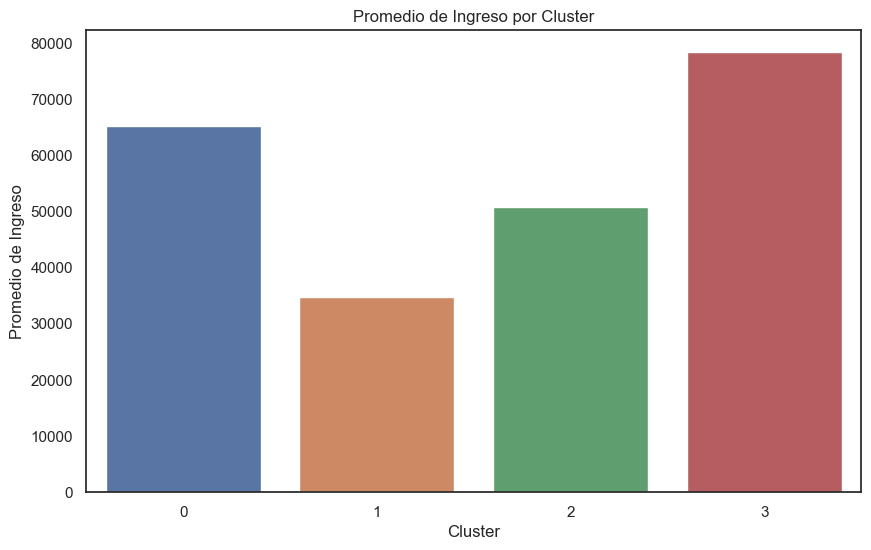

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupa los datos por la columna 'Cluster' y calcula el promedio de 'Income' para cada clúster
cluster_means = df_new.groupby('Cluster')['Income'].mean().reset_index()

# Grafica el promedio de 'Income' por clúster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Income', data=cluster_means)
plt.xlabel('Cluster')
plt.ylabel('Promedio de Ingreso')
plt.title('Promedio de Ingreso por Cluster')
plt.show()

# Analisis de consumo por Clúster

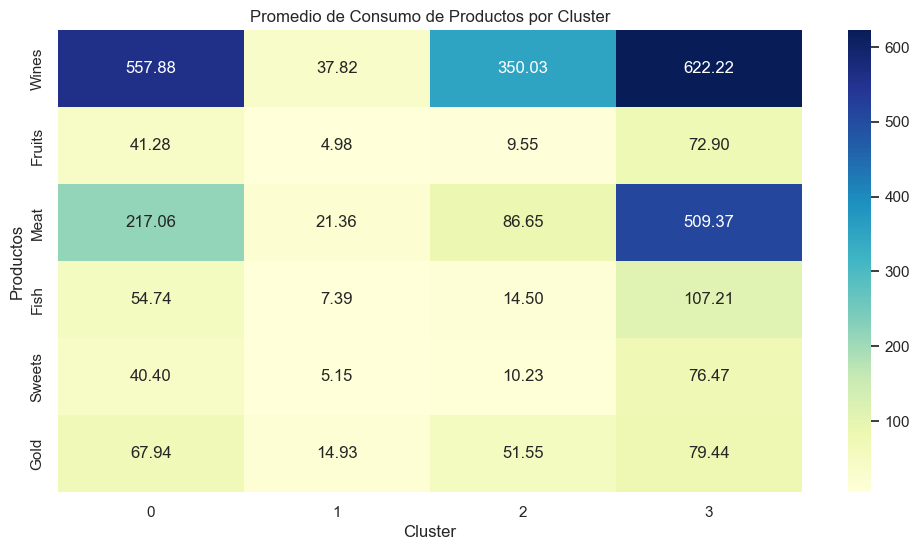

In [46]:
# Columnas de productos
product_columns = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

# Estadísticas de resumen por cluster
cluster_product_summary = df_new.groupby('Cluster')[product_columns].mean()

# Visualización de patrones de consumo
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_product_summary.T, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True)
plt.title("Promedio de Consumo de Productos por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Productos")
plt.show()

Las 10 combinaciones de productos más frecuentes son:
                                Combination Frequency
1   Fish, Fruits, Gold, Meat, Sweets, Wines      1431
3           Fish, Fruits, Gold, Meat, Wines       162
0           Fish, Gold, Meat, Sweets, Wines       150
5                         Gold, Meat, Wines       144
4         Fruits, Gold, Meat, Sweets, Wines       141
9                 Fruits, Gold, Meat, Wines        40
7                   Fish, Gold, Meat, Wines        38
8                 Gold, Meat, Sweets, Wines        32
2         Fish, Fruits, Meat, Sweets, Wines        22
12                              Meat, Wines        12


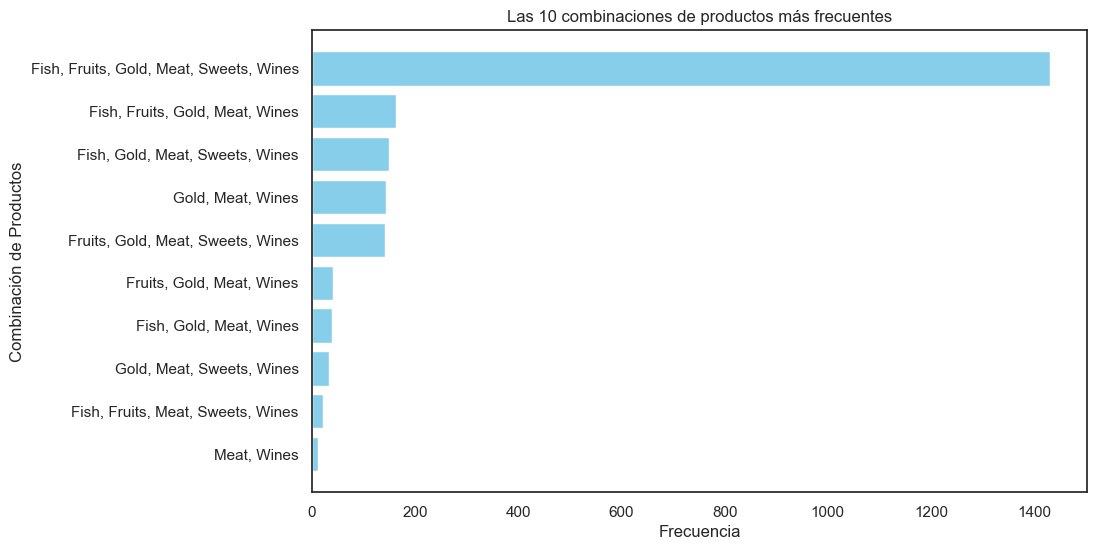

In [47]:
import pandas as pd

# Obtener las columnas de productos
product_columns = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

# Crear un DataFrame vacío para almacenar las combinaciones de productos y su frecuencia
product_combinations = pd.DataFrame(columns=['Combination', 'Frequency'])

# Iterar a través de las filas de df_new y contar las combinaciones de productos
for index, row in df_new.iterrows():
    products_purchased = [col for col in product_columns if row[col] > 0]
    combination = ', '.join(sorted(products_purchased))

    # Buscar si ya existe esta combinación en el DataFrame product_combinations
    existing_row = product_combinations[product_combinations['Combination'] == combination]

    # Si existe, incrementar la frecuencia, de lo contrario, agregar una nueva fila
    if not existing_row.empty:
        product_combinations.loc[existing_row.index, 'Frequency'] += 1
    else:
        product_combinations = product_combinations.append({'Combination': combination, 'Frequency': 1}, ignore_index=True)

# Ordenar las combinaciones por frecuencia en orden descendente
product_combinations = product_combinations.sort_values(by='Frequency', ascending=False)

# Mostrar las combinaciones más frecuentes
top_combinations = product_combinations.head(10)
print("Las 10 combinaciones de productos más frecuentes son:")
print(top_combinations)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_combinations['Combination'], top_combinations['Frequency'], color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Combinación de Productos')
plt.title('Las 10 combinaciones de productos más frecuentes')
plt.gca().invert_yaxis()  # Invertir el eje y para que la combinación más frecuente esté en la parte superior
plt.show()

# Explorar los perfiles de cada clúster en términos de gasto, ingresos y categorías de productos

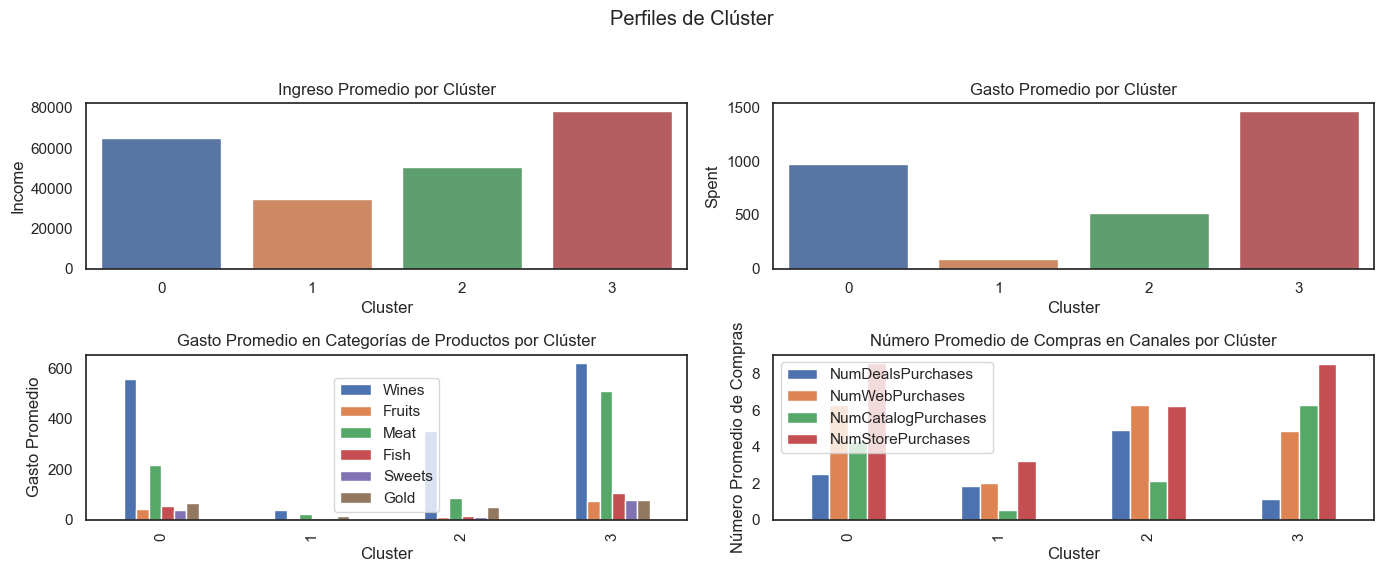

,Income,Spent,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Cluster,,,,,,,,,,,,
0,65225.990826,979.300459,557.878440,41.277523,217.061927,54.743119,40.399083,67.940367,2.520642,6.305046,4.305046,8.628440
1,34827.243434,91.624242,37.821212,4.978788,21.363636,7.386869,5.145455,14.928283,1.857576,2.008081,0.527273,3.196970
2,50806.835735,522.512968,350.034582,9.547550,86.651297,14.498559,10.230548,51.550432,4.904899,6.273775,2.121037,6.236311
3,78326.683371,1467.612756,622.223235,72.897494,509.369021,107.214123,76.466970,79.441913,1.143508,4.849658,6.323462,8.548975


In [48]:
# Explorar los perfiles de cada clúster en términos de gasto, ingresos y categorías de productos
cluster_profiles = df_new.groupby('Cluster').mean()

# Visualizar los perfiles de cada clúster
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar la figura de matplotlib
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Perfiles de Clúster')

# Gráfico de ingreso promedio por clúster
sns.barplot(ax=axes[0, 0], x=cluster_profiles.index, y=cluster_profiles['Income'])
axes[0, 0].set_title('Ingreso Promedio por Clúster')

# Gráfico de gasto promedio por clúster
sns.barplot(ax=axes[0, 1], x=cluster_profiles.index, y=cluster_profiles['Spent'])
axes[0, 1].set_title('Gasto Promedio por Clúster')

# Gráfico de gasto promedio en diferentes categorías de productos por clúster
product_cols = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
cluster_profiles[product_cols].plot(kind='bar', ax=axes[1, 0], figsize=(14, 6))
axes[1, 0].set_title('Gasto Promedio en Categorías de Productos por Clúster')
axes[1, 0].set_ylabel('Gasto Promedio')

# Gráfico del número promedio de compras en diferentes canales por clúster
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
cluster_profiles[purchase_cols].plot(kind='bar', ax=axes[1, 1], figsize=(14, 6))
axes[1, 1].set_title('Número Promedio de Compras en Canales por Clúster')
axes[1, 1].set_ylabel('Número Promedio de Compras')

# Ajustar diseño
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

cluster_profiles[['Income', 'Spent'] + product_cols + purchase_cols]
